In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data_paths = (
    ("./data/LoanStats_2018Q1.csv", "q1"),
    ("./data/LoanStats_2018Q2.csv", "q2"),
    ("./data/LoanStats_2018Q3.csv", "q3"),
    ("./data/LoanStats_2018Q4.csv", "q4")
)

## Concatenate Dataframes
<p>Since the data is provided to us on a quarterly basis, we're going to create a dataframe for each quarter and concatenate the dataframes together. This will allows us to reference one object for all quarterly loans. We also add the column "quarter" so we can keep track of which loans belong to which quarter.</p>

In [3]:
loan_stats = pd.DataFrame()
for filename, quarter in data_paths:
    df = pd.read_csv(filename, low_memory=False, skiprows=1)
    df["quarter"] = quarter
    loan_stats = pd.concat([loan_stats, df], axis=0)


In [4]:
loan_stats.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,495242.000000,495242.000000,495242.000000,495242.000000,4.952420e+05,0.0,0.0,494110.000000,495242.000000,...,590.0,590.000000,590.0,590.000000,487.000000,590.000000,590.000000,865.000000,865.000000,865.000000
mean,NaN,16025.020394,16025.020394,16021.669277,466.610441,8.009399e+04,NaN,NaN,19.668887,0.229252,...,3.0,200.987254,3.0,13.581356,611.095626,15785.105085,220.900542,7103.209757,52.673815,18.124855
std,NaN,10138.075023,10138.075023,10137.900298,286.909339,8.887161e+04,NaN,NaN,20.458244,0.743665,...,0.0,145.553591,0.0,8.532132,430.427422,9108.061726,204.608260,4924.797674,8.818974,6.663933
min,NaN,1000.000000,1000.000000,725.000000,29.760000,0.000000e+00,NaN,NaN,0.000000,0.000000,...,3.0,5.950000,3.0,0.000000,31.470000,424.110000,0.070000,413.930000,29.920000,1.000000
25%,NaN,8000.000000,8000.000000,8000.000000,254.560000,4.600000e+04,NaN,NaN,11.430000,0.000000,...,3.0,90.240000,3.0,7.000000,277.935000,8202.280000,63.075000,3372.000000,45.000000,16.000000
50%,NaN,14000.000000,14000.000000,14000.000000,386.820000,6.600000e+04,NaN,NaN,17.710000,0.000000,...,3.0,170.260000,3.0,14.000000,523.170000,13891.090000,165.265000,5677.130000,50.000000,18.000000
75%,NaN,22000.000000,22000.000000,22000.000000,629.040000,9.600000e+04,NaN,NaN,25.030000,0.000000,...,3.0,272.995000,3.0,21.000000,824.880000,22414.395000,334.452500,9800.000000,60.000000,24.000000
max,NaN,40000.000000,40000.000000,40000.000000,1670.150000,9.930475e+06,NaN,NaN,999.000000,58.000000,...,3.0,876.460000,3.0,30.000000,2535.660000,40149.350000,1159.620000,28503.000000,80.000000,24.000000


In [5]:
loan_stats.shape

(495250, 145)

## Remove Columns with Null Data
<p>Based on the description above, a few columns have null information in regards to the loan statistics. We are going to examine each column further to determine which columns can be removed. From our initial glance, it is evident that the member_id and url columns can be removed.</p>
<p>In order to determine which columns will be dropped, we'll have some threshold that determines whether or not a column should be removed. This thresehold value will be in range(0, 1). If a particular column has  at least &lt;threshold&gt;% of values null, we drop the column. </p>
<p>Additional information regarding the columns can be found <a href="https://www.lendingclub.com/info/download-data.action">here</a></p>
<p>Here, I made use of a pretty conventional split. If more than 80% of any column has null information, I drop that column</p>

In [6]:
THRESHOLD = int(.8 * loan_stats.shape[0])
loan_stats = loan_stats.dropna(axis=1, thresh=THRESHOLD)

## Carved Dataframe
<p>With the current heuristic applied, we notice that 44 columns have been dropped from our dataframe. Later on, we will explore some statistical ways of removing other columns that are not of interest.</p>

In [7]:
loan_stats.shape

(495250, 102)

In [8]:
loan_stats.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,495242.000000,495242.000000,495242.000000,495242.000000,4.952420e+05,494110.000000,495242.000000,495242.000000,495242.000000,495242.000000,...,495242.000000,495242.000000,495240.000000,488646.000000,495242.000000,495242.000000,4.952420e+05,4.952420e+05,4.952420e+05,4.952420e+05
mean,16025.020394,16025.020394,16021.669277,466.610441,8.009399e+04,19.668887,0.229252,0.442192,11.491554,0.134514,...,0.059932,2.030478,94.580900,32.891971,0.123489,0.010918,1.849417e+05,5.192192e+04,2.667946e+04,4.568810e+04
std,10138.075023,10138.075023,10137.900298,286.909339,8.887161e+04,20.458244,0.743665,0.724613,5.947129,0.384829,...,0.420412,1.890030,9.092862,35.015405,0.335296,0.182740,1.886940e+05,5.339667e+04,2.582489e+04,4.797206e+04
min,1000.000000,1000.000000,725.000000,29.760000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,254.560000,4.600000e+04,11.430000,0.000000,0.000000,7.000000,0.000000,...,0.000000,1.000000,92.300000,0.000000,0.000000,0.000000,5.205900e+04,1.953000e+04,9.800000e+03,1.492600e+04
50%,14000.000000,14000.000000,14000.000000,386.820000,6.600000e+04,17.710000,0.000000,0.000000,10.000000,0.000000,...,0.000000,2.000000,100.000000,25.000000,0.000000,0.000000,1.162925e+05,3.755600e+04,1.920000e+04,3.375400e+04
75%,22000.000000,22000.000000,22000.000000,629.040000,9.600000e+04,25.030000,0.000000,1.000000,14.000000,0.000000,...,0.000000,3.000000,100.000000,57.100000,0.000000,0.000000,2.692915e+05,6.611900e+04,3.520000e+04,6.191400e+04
max,40000.000000,40000.000000,40000.000000,1670.150000,9.930475e+06,999.000000,58.000000,5.000000,101.000000,52.000000,...,58.000000,26.000000,100.000000,100.000000,7.000000,52.000000,9.999999e+06,2.622906e+06,1.569000e+06,2.118996e+06


## Fully Paid Loans...a.k.a PAID IN FULL :)
<img src="./img/mitch.jpeg">
<p>Now I'd like to see what some of the characteristic of paid off loans have in common. If the image above doesn't stand out to you, please do me a favor and watch the movie "Paid In Full." Any ways, with the help of Money Makin' Mitch and some good ole Python, we are going to separate from our data the loans that have been paid in full.</p>
<p>Keep in mind the dataframe for the loans that have been fully paid are fully paid! Thus, we can drop the loan_status column from our dataframe. I also noticed that the loans that have been paid in full have equivalent values for loan_amnt and funded_amnt, therefore one of the columns may be dropped as well.</p>
<p>Now we want to do some data pre-processing and change some of our data so that it is in a format that is conducive for our purposes.</p>


In [9]:
paid_in_full = loan_stats[loan_stats["loan_status"] == "Fully Paid"] # .drop(drop_from_paid, axis="columns")

In [10]:
paid_in_full.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,quarter
5,3000.0,3000.0,3000.0,36 months,7.34%,93.10,A,A4,Scale Technician,9 years,...,0.0,0.0,0.0,191216.0,141.0,30500.0,0.0,N,N,q1
14,5000.0,5000.0,5000.0,36 months,11.98%,166.03,B,B5,SDO Supervisor,10+ years,...,33.3,1.0,0.0,61551.0,28880.0,22000.0,27751.0,N,N,q1
28,7000.0,7000.0,7000.0,36 months,11.98%,232.44,B,B5,Parole,< 1 year,...,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,N,N,q1
34,10000.0,10000.0,10000.0,36 months,10.90%,326.92,B,B4,Police Service Specialist,< 1 year,...,0.0,1.0,0.0,72124.0,74220.0,2300.0,67724.0,N,N,q1
39,28000.0,28000.0,28000.0,36 months,10.90%,915.36,B,B4,Corporate Ergonomist,6 years,...,11.1,0.0,0.0,153679.0,76475.0,80300.0,73379.0,N,N,q1


## Data Pre-Processing: Scrub-A-Dub-Dub
### A Few Objectives
<ol>
    <li>
        The first column that stands out to me is the term column. All values are either 36 months or 60 months, so this is a column with binary attributes. I first considered changing the column name from `term` to `is_36_months` and associating the value of 1 or 0 with each row. Instead, I think I'll just remove the string "months" from each row and convert that column into an integer.
    </li>
    <li>
        Interest rate (`int_rate`) is stored as a decimal with the percentage sign after it. This is redundant and causes our column to reflect that of the string data type. Let's replace every `%` with an empty string, convert the remainder of the string to a float, then divide by 100 to get the equivalent percent. We will also ensure that the precision of the percentage is up to the ten thousandths.
    </li>
    <li>
        The annual income (`annual_inc`) column needs to be explored further. Let's consider grouping values within a particular range together. This will reduce the number of unique values for this column.
    </li>
    <li>
        The `verification_status` column needs a little bit more exploring. The values `Source Verified` and `Verified` seem to mean the same to me.
    </li>
    <li>
        We can rename the `issue_d` column to `issue_date` to be a little more explicit in our naming. I'd also consider adding a year column, if not already present, to our dataframe in the event we want to merge multiple years of data together.
    </li>
    <li>
        For loans that have been paid in full, there appears to be no payment plan in place and the entire column has the exact same value. We will drop this column (`pymnt_plan`) from our dataframe.
    </li>
    <li>
        Title and purpose both have the exact same values, but since I like the name `purpose` more than I like `title` and I like the representation of information in `title` better than that of `purpose`, I am going to drop the `purpose` column and rename the `title` column `purpose`. The only minor difference is that the purpose column has loan information about 2 instances of a wedding. So, maybe explore how you would want to go about removing this redundant data.
    </li>
    <li>
        <strike>We keep the `zip_code` column and potentially explore graphing with geolocation data.</strike>
    </li>
    <li>
        After looking at the `addr_state` column, I've decided to rid myself of the `zip_code` column.
    </li>
    <li>
        Not entirely sure what `dti` informs me of, so I'll leave it alone.
    </li>
    <li>
        I am going to convert `earliest_cr_line` into years instead of month-year pairs.
    </li>
    <li>
        Remove `out_prncp`, `policy_code`, `acc_now_delinq`, `num_tl_120dpd_2m`, `num_tl_30dpd` and `out_prncp_inv` since they are all/mostly the same
    </li>
    <li>
        Remove `next_pymnt_d` since all loans that are paid off have no next payment date.
    </li>
</ol>

## Objective #1
<p>The first column that stands out to me is the term column. All values are either 36 months or 60 months, so this is a column with binary attributes. I first considered changing the column name from `term` to `is_36_months` and associating the value of 1 or 0 with each row. Instead, I think I'll just remove the string "months" from each row and convert that column into an integer.</p>

In [11]:
def clean_term(element):
    element = str(element).replace("months", "")
    element = int(element)
    return element

paid_in_full["term"] = paid_in_full["term"].apply(clean_term)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Objective #2
<p>Interest rate (`int_rate`) is stored as a decimal with the percentage sign after it. This is redundant and causes our column to reflect that of the string data type. Let's replace every `%` with an empty string, convert the remainder of the string to a float, then divide by 100 to get the equivalent percent. We will also ensure that the precision of the percentage is up to the ten thousandths.</p>

In [12]:
def clean_int_rate(element):
    element = str(element).replace("%", "")
    element = float(element) / 100
    return element

paid_in_full["int_rate"] = paid_in_full["int_rate"].apply(clean_int_rate)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Objective #3
<p>The annual income (`annual_inc`) column needs to be explored further. Let's consider grouping values within a particular range together. This will reduce the number of unique values for this column.</p>

In [13]:
def categorize_annual_income(element):
    if element < 0:
        pass
    elif element < 20_000:
        return "poverty"
    elif element < 45_000:
        return "lower_class"
    elif element < 140_000:
        return "middle_class"
    elif element < 150_000:
        return "upper_middle_class"
    elif element < 200_000:
        return "upper_class"
    else:
        return "hgihest_tax_brackets"

paid_in_full = paid_in_full.rename(columns={"annual_inc": "income_class"})
paid_in_full["income_class"] = paid_in_full["income_class"].apply(categorize_annual_income)

### The Middle Class Loan Warriors
<p>Turns out that people whose annual income classifies them as the middle class take out more loans than any other group of people combined.</p>

In [14]:
paid_in_full["income_class"].value_counts()

middle_class            43186
lower_class             11704
upper_class              2918
hgihest_tax_brackets     2058
poverty                  1270
upper_middle_class       1049
Name: income_class, dtype: int64

## Objective #4
<p>The `verification_status` column needs a little bit more exploring. The values `Source Verified` and `Verified` seem to mean the same to me.</p>
<p>Still not quite sure what to do with this column. We'll see what happens to this column when we explore feature engineering and extract the most relevant features.</p>

## Objective #5
<p>We can rename the `issue_d` column to `issue_date` to be a little more explicit in our naming. I'd also consider adding a year column, if not already present, to our dataframe in the event we want to merge multiple years of data together.</p>

In [15]:
paid_in_full = paid_in_full.rename(columns={"issue_d": "issue_date"})

## Objective #6
<p>For loans that have been paid in full, there appears to be no payment plan in place and the entire column has the exact same value. We will drop this column (`pymnt_plan`) from our dataframe.</p>

In [16]:
paid_in_full = paid_in_full.drop("pymnt_plan", axis=1)
print(paid_in_full.shape)

(62185, 101)


## Objective #7
<p>Title and purpose both have the exact same values, but since I like the name `purpose` more than I like `title` and I like the representation of information in `title` better than that of `purpose`, I am going to drop the `purpose` column and rename the `title` column `purpose`. The only minor difference is that the purpose column has loan information about 2 instances of a wedding. So, maybe explore how you would want to go about removing this redundant data.</p>

In [17]:
paid_in_full = paid_in_full.drop("purpose", axis=1).rename(columns={"title": "purpose"})

## Objective #9
<p>After looking at the `addr_state` column, I've decided to rid myself of the `zip_code` column.</p>

In [18]:
paid_in_full = paid_in_full.drop("zip_code", axis=1)

## Objective #11
<p>I am going to convert `earliest_cr_line` into years instead of month-year pairs.</p>

In [19]:
year_pattern = r"(?P<earliest_cr_line_year>[1-2][0-9]{3})"
# paid_in_full
paid_in_full["earliest_cr_line"] = paid_in_full["earliest_cr_line"].str.extract(year_pattern)["earliest_cr_line_year"]
paid_in_full = paid_in_full.rename(columns={"earliest_cr_line": "earliest_cr_line_year"})

In [20]:
paid_in_full["earliest_cr_line_year"].describe()

count     62185
unique       61
top        2005
freq       5072
Name: earliest_cr_line_year, dtype: object

## Objective #12
<p>Remove `out_prncp`, `policy_code`, `acc_now_delinq`, `num_tl_120dpd_2m`, `num_tl_30dpd` and `out_prncp_inv` since they are all/mostly the same</p>

In [21]:
drop_cols = ["out_prncp", "policy_code", "acc_now_delinq", "num_tl_120dpd_2m", "num_tl_30dpd", "out_prncp_inv"]
paid_in_full = paid_in_full.drop(columns=drop_cols)

In [22]:
paid_in_full.shape

(62185, 93)

## Objective #13
<p>Remove `next_pymnt_d` since all loans that are paid off have no next payment date.</p>

In [23]:
paid_in_full = paid_in_full.drop(columns="next_pymnt_d")
paid_in_full.shape

(62185, 92)

# Sum of Investor Profits
<p>Since the average loan on lending club is given to an individual from multiple investors, let's just add an additional column that contains this value. That is, we want to take the `total_pymnt` save the `funded_amnt` to determine the total investor profit.</p>

In [24]:
paid_in_full["inv_profit"] = paid_in_full["total_pymnt"] - paid_in_full["funded_amnt"]

In [25]:
paid_in_full["inv_profit"].describe()

count    62185.000000
mean       888.710558
std       1019.627722
min          0.000000
25%        212.200000
50%        545.670875
75%       1183.938903
max      11653.389338
Name: inv_profit, dtype: float64

## Which grade loans perform the best, i.e. yield the most profit? Which sub grade loans perform the best?

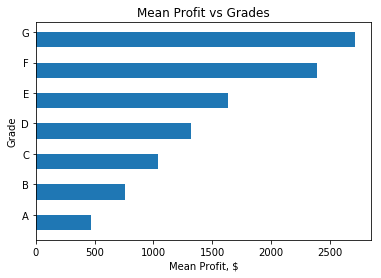

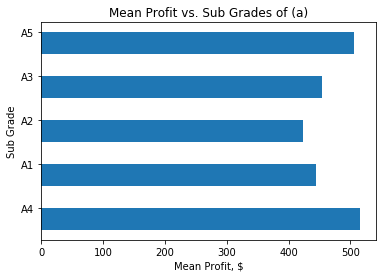

In [26]:
def bar_plot_by_subgrade(df, grade):
    fig, ax = plt.subplots()
    sub_grades = [sg for sg in df["sub_grade"].unique() if grade.upper() in sg]
    sgrade_positions = np.arange( len(sub_grades) ) + .75
    tick_positions = range(1, len(sub_grades) + 1)
    
    sgrade_widths = []
    for sgr in sub_grades:
        sgrade = df.loc[df["sub_grade"] == sgr, "inv_profit"]
        sgrade_mean = sgrade.mean()
        sgrade_widths.append( int(sgrade_mean) )
        
    ax.barh(sgrade_positions, sgrade_widths, 0.5)
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(sub_grades)
    ax.set_ylabel("Sub Grade")
    ax.set_xlabel("Mean Profit, $")
    ax.set_title(f"Mean Profit vs. Sub Grades of ({grade})")
    
    plt.show()


def bar_plot_by_grade(df):
    fig, ax = plt.subplots()
    grades = list(sorted(df["grade"].unique()))
    grade_positions = np.arange( len(grades) ) + .75
    tick_positions = range(1, len(grades) + 1)

    grade_widths = []
    for gr in grades:
        grade = df.loc[df["grade"] == gr, "inv_profit"]
        grade_mean = grade.mean()
        grade_widths.append( int(grade_mean) )

    
    ax.barh(grade_positions, grade_widths, 0.5)
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(grades)
    ax.set_ylabel("Grade")
    ax.set_xlabel("Mean Profit, $")
    ax.set_title("Mean Profit vs Grades")
    
    plt.show()

bar_plot_by_grade(paid_in_full)
bar_plot_by_subgrade(paid_in_full, "a")
# for grade in paid_in_full["grade"].unique():
#     bar_plot_by_subgrade(paid_in_full, grade)

## Observances
<p>The above shows that the average profit obtained increased the lower the grade on the loan, which was expected since the interest rate of lower quality loans tend to be higher. From a surface level inspection, this looks as if loans of lower quality perform better, but we have to keep in mind that these are the loans that are paid off. Some questions to consider:</p>
<ul>
    <li>What ratio of paid in full loans belong to each category?</li>
    <li>Which category of loans has the highest expected value?</li>
</ul>
<p>Observing the profits across sub grade also informs us that each sub grade performs relatively the same, therefore adjusting your investments for sub grade quality will not yield significant changes.</p>

### Calculating the expected value of loans by grade

In [27]:
mean_grade_profit = []

grades = sorted(paid_in_full["grade"].unique())
for gr in grades:
    # Grab every row for each grade and observe the mean investment profit
    grade = paid_in_full.loc[paid_in_full["grade"] == gr, "inv_profit"]
    grade_mean = grade.mean()
    mean_grade_profit.append( int(grade_mean) )
    
mean_grade_profit = pd.Series(mean_grade_profit, index=grades)

# print(paid_in_full["grade"].value_counts(normalize=True))
# ev_loan_grade = paid_in_full["grade"].value_counts(normalize=True) * mean_grade_profit
# best_loan_class = ev_loan_grade.idxmax()

# print(
#     f"The grade that peforms the best, in expectation, are the class of loans {best_loan_class}.\n",
#     ev_loan_grade,
#     sep='\n'
# )

In [28]:
mean_grade_profit

A     472
B     755
C    1035
D    1319
E    1638
F    2390
G    2713
dtype: int64

In [29]:
(paid_in_full["grade"].value_counts(normalize=True).sort_index() * mean_grade_profit).sum()

888.1869421886306

In [30]:
paid_in_full["inv_profit"].shape

(62185,)

## Let's do a quick recap
Thus far, we have imported our data, cleaned up a few columns, and removed columns with majority null. Now, let's do some feature selection. We'll play around with the number of features we'd like to keep, but let's start off by keeping the sqrt(ceil(m)) features where m is the number of columns.

## Feature Selection Time
<p>I'm not quite sure what is the best heuristic for the number of features that should be maintained and I'm sure it is situational, but I am going to keep the sqrt(# cols) of features.</p>
<p>To do so, I've imported <code>SelectKBest</code> and <code>chi2</code> from the sklearn library to do so.</p>
<p>Add a metric for evaluating whether an investment is considered `good` or `bad` based on the ROI.</p>

In [56]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
pif_numeric.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_a

In [92]:
pif_numeric = paid_in_full.select_dtypes(include=["float64", "int64"])
# ROI series
roi_pcnt = (pif_numeric["total_pymnt"] - pif_numeric["loan_amnt"]) / pif_numeric["loan_amnt"]
# is_good_inv = .09 # Triple the average rate of inflation
is_good_inv = .055
pif_numeric["good_inv"] = roi_pcnt > is_good_inv
pif_numeric["good_inv"].value_counts()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    33404
True     28781
Name: good_inv, dtype: int64

In [93]:
X = pif_numeric.loc[:, ~pif_numeric.columns.isin(["good_inv", "inv_profit"])].dropna(axis=1)
y = pif_numeric.loc[:, pif_numeric.columns == "good_inv"].astype(int)
y.columns

Index(['good_inv'], dtype='object')

In [94]:
selector = SelectKBest(chi2, k=int(round(np.sqrt(pif_numeric.shape[1]))))
selector.fit(X, y)
kbest_features = selector.get_support(indices=True)

In [95]:
# Grab k best features
X_new = pif_numeric[pif_numeric.columns[kbest_features]]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.20)
clf = LogisticRegression()
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
clf.score(X_test, y_test)

0.9998391895151564

In [105]:
X_train.columns

Index(['total_acc', 'total_pymnt', 'total_rec_prncp',
       'collections_12_mths_ex_med', 'tot_coll_amt', 'open_rv_12m',
       'num_bc_tl', 'num_il_tl', 'num_op_rev_tl'],
      dtype='object')

In [108]:
X_train.head()

,total_acc,total_pymnt,total_rec_prncp,collections_12_mths_ex_med,tot_coll_amt,open_rv_12m,num_bc_tl,num_il_tl,num_op_rev_tl
108957,33.0,39134.452966,38000.0,0.0,0.0,2.0,9.0,23.0,4.0
100328,20.0,10285.806689,9000.0,0.0,0.0,3.0,9.0,5.0,13.0
75817,43.0,3067.826242,3000.0,0.0,0.0,1.0,16.0,10.0,12.0
107372,24.0,30722.395218,30300.0,0.0,0.0,0.0,11.0,6.0,11.0
59678,8.0,15496.010803,15000.0,0.0,0.0,1.0,4.0,3.0,3.0


In [111]:
clf.predict([
    [33, 4400, 4160, 0, 0, 2, 9, 23, 4]
])

array([1])